In [1]:
import numpy as np

# Chi-squared test on the data
from scipy.stats import chisquare

74.0+-1.5, 67.5+-0.5 and 82+-8. What would you recommend to use as a combined value? A fourth statistically independent (then very recenmt) measurement gave 72.5+-2.2,

In [2]:
# Chi-squared test

def chiSquare(observed, expected, variance):
    return np.sum((observed - expected)**2/variance)


# Calculating s

def s(chi2, ndf):
    return np.sqrt(chi2/(ndf-1))

In [3]:


H_const = np.array([74.0, 67.5, 82.0])
H_err = np.array([1.5, 0.5, 8.0])

# Naively taking the mean
H = np.mean(H_const)
# H_err = np.std(H_const)

print("H", H, H_err)


H_const_new = np.array([74.0, 67.5, 82.0, 72.5])
H_err_new = np.array([1.5, 0.5, 8.0, 2.2])

# Naively taking the mean
H_new = np.mean(H_const_new)
# H_err_new = np.std(H_const_new)

print("H_new", H_new, H_err_new)





# Using H_const and H_err
chisquare_1 =chiSquare(H_const, H, H_err**2)

# Using scipy 
scipy_1 = chisquare(H_const, H, ddof=1)



print("Chisquared handmade", chisquare_1)
print("")
print("chisqaured scipy", scipy_1)
print("s: ", s(chisquare_1, 3))
print("s_scipy: ", s(scipy_1[0], 3))




print("------------------")




# Using H_const and H_err
chisquare_2 = chiSquare(H_const_new, H_new, H_err_new**2)

# Using scipy 
scipy_2 = chisquare(H_const_new, H_new, ddof=1)



print(chisquare_2)
print("")
print(scipy_2)



print("s: ", s(chisquare_2, 4))
print("s_scipy: ", s(scipy_2[0], 4))




H 74.5 [1.5 0.5 8. ]
H_new 74.0 [1.5 0.5 8.  2.2]
Chisquared handmade 196.99001736111111

chisqaured scipy Power_divergenceResult(statistic=1.4161073825503356, pvalue=0.2340451728715029)
s:  9.9244651584131
s_scipy:  0.8414592629920761
------------------
170.46487603305786

Power_divergenceResult(statistic=1.4662162162162165, pvalue=0.48041349014240875)
s:  7.538012028668608
s_scipy:  0.6990985186214735


# The plots for the non-weighted averages

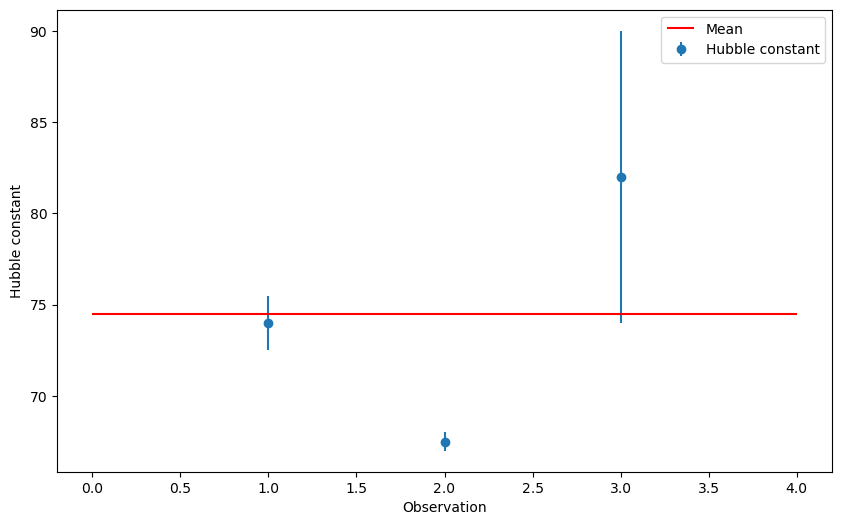

In [4]:
# Visualizing the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.errorbar([1, 2, 3], H_const, yerr=H_err, fmt='o', label='Hubble constant')


# Plotting the mean
plt.hlines(H, 0, 4, label='Mean', color='red')

plt.xlabel('Observation')
plt.ylabel('Hubble constant')
plt.legend()
plt.show()



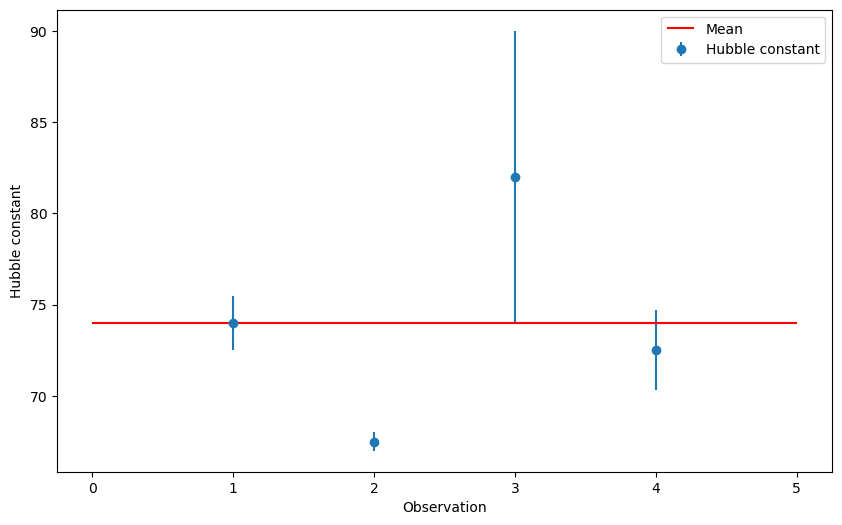

In [5]:
# Visualizing the new data
plt.figure(figsize=(10, 6))
plt.errorbar([1, 2, 3, 4], H_const_new, yerr=H_err_new, fmt='o', label='Hubble constant')


# Plotting the mean
plt.hlines(H_new, 0, 5, label='Mean', color='red')


plt.xlabel('Observation')
plt.ylabel('Hubble constant')
plt.legend()
plt.show()

# For the weighted 

In [6]:

# The weighted average is calculated
H_weighted = np.average(H_const, weights=1/H_err**2)



# Weighted average for H_new
H_weighted_new = np.average(H_const_new, weights=1/H_err_new**2)



# Using H_const and H_err
weighted_chisquare_1 =chiSquare(H_const, H_weighted, H_err**2)

# # Using scipy 
# weighted_scipy_1 = chisquare(H_const, H_weighted, ddof=1)



print("Chisquared handmade", weighted_chisquare_1)
print("s: ", s(weighted_chisquare_1, 3))
print("")
# print("chisqaured scipy", weighted_scipy_1)
# print("s_scipy: ", s(weighted_scipy_1[0], 3))




print("------------------")
print("For the new data: ")



# Using H_const and H_err
weighted_chisquare_2 = chiSquare(H_const_new, H_weighted_new, H_err_new**2)

# # Using scipy 
# weighted_scipy_2 = chisquare(H_const_new, H_weighted_new, ddof=1)



print("Weighted chi2", weighted_chisquare_2)

print("s: ", s(weighted_chisquare_2, 4))

# print("")
# print(weighted_scipy_2)

# print("s_scipy: ", s(weighted_scipy_2[0], 4))




Chisquared handmade 19.886726352666404
s:  3.153309876357413

------------------
For the new data: 
Weighted chi2 23.540349855034144
s:  2.801211038999272


<ErrorbarContainer object of 3 artists>

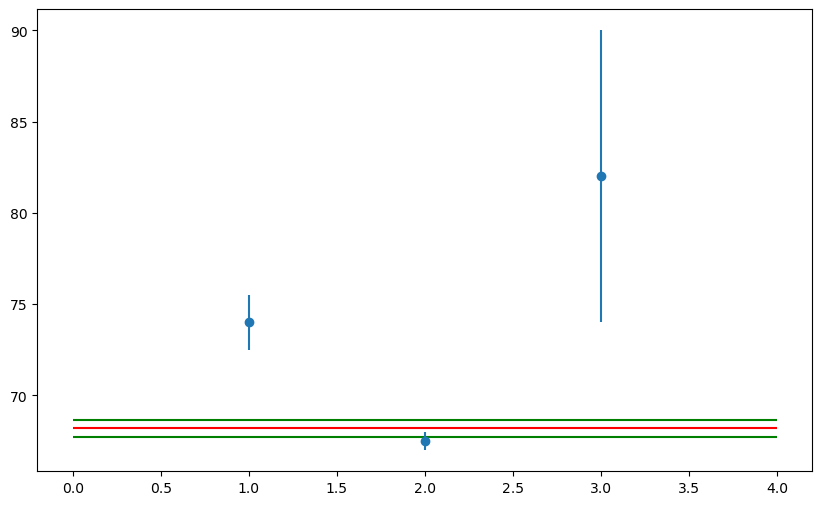

In [7]:
# The weighted average is calculated
plt.figure(figsize=(10, 6))


H_weighted_std = np.sqrt(1/np.sum(1/H_err**2))

# plt.hlines(H_weighted)

# Plotting the weighted standard deviation
plt.hlines(H_weighted + H_weighted_std, 0, 4, label='Weighted standard deviation', color='green')
plt.hlines(H_weighted - H_weighted_std, 0, 4, color='green')


# Plotting the weighted average
plt.hlines(H_weighted, 0, 4, label='Weighted average', color='red')
plt.errorbar([1, 2, 3], H_const, yerr=H_err, fmt='o', label='Hubble constant')

<ErrorbarContainer object of 3 artists>

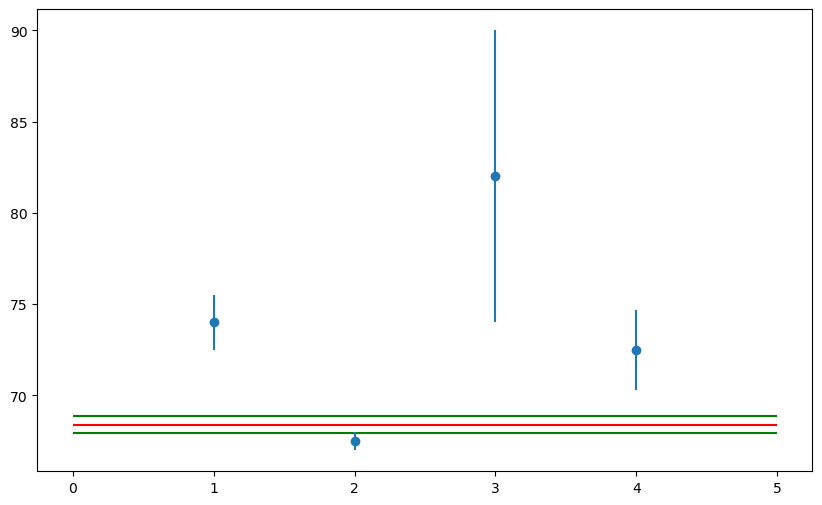

In [8]:
plt.figure(figsize=(10, 6))
H_weighted_std_new = np.sqrt(1/np.sum(1/H_err_new**2))


plt.hlines(H_weighted_new + H_weighted_std_new, 0, 5, label='Weighted standard deviation', color='green')
plt.hlines(H_weighted_new - H_weighted_std_new, 0, 5, color='green')



# Plotting
plt.hlines(H_weighted_new, 0, 5, label='Weighted average', color='red')
plt.errorbar([1, 2, 3, 4], H_const_new, yerr=H_err_new, fmt='o', label='Hubble constant')

# Exluding the point with the highest uncertainty 

In [9]:
# H_const_new = np.array([74.0, 67.5, 82.0, 72.5])
# H_err_new = np.array([1.5, 0.5, 8.0, 2.2])

# Excluding the third point
H_const_new_excl = np.array([74.0, 67.5, 72.5])
H_err_new_excl = np.array([1.5, 0.5, 2.2])

In [10]:
# We define a function that calculates the weighted average and the weighted standard deviation
def weightedAverage(data, error):
    return np.average(data, weights=1/error**2), np.sqrt(1/np.sum(1/error**2))

weighted_average, weighted_std = weightedAverage(H_const_new_excl, H_err_new_excl)




<ErrorbarContainer object of 3 artists>

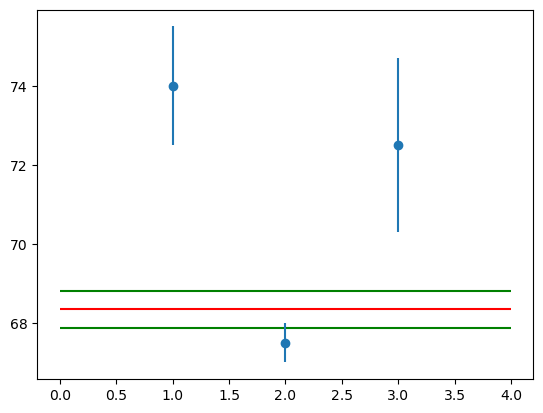

In [11]:
# Plotting 
plt.hlines(weighted_average + weighted_std, 0, 4, label='Weighted standard deviation', color='green')
plt.hlines(weighted_average - weighted_std, 0, 4, color='green')
plt.hlines(weighted_average, 0, 4, label='Weighted average', color='red')

plt.errorbar([1, 2, 3], H_const_new_excl, yerr=H_err_new_excl, fmt='o', label='Hubble constant')


In [14]:
# Exluding the second point
H_const_new_excl = np.array([74.0, 82.0, 72.5])
H_err_new_excl = np.array([1.5, 8.0, 2.2])


<ErrorbarContainer object of 3 artists>

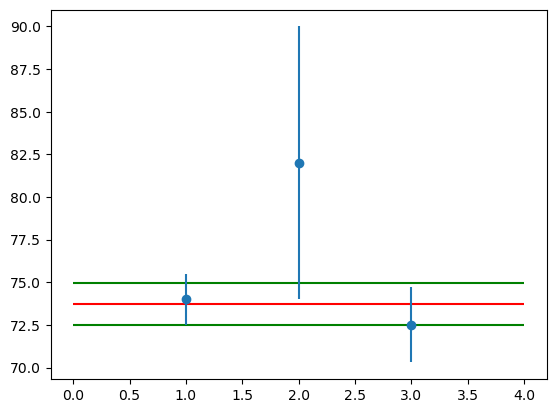

In [15]:
# Defining averages
weighted_average1, weighted_std1 = weightedAverage(H_const_new_excl, H_err_new_excl)

# Plotting
plt.hlines(weighted_average1 + weighted_std1, 0, 4, label='Weighted standard deviation', color='green')
plt.hlines(weighted_average1 - weighted_std1, 0, 4, color='green')
plt.hlines(weighted_average1, 0, 4, label='Weighted average', color='red')

plt.errorbar([1, 2, 3], H_const_new_excl, yerr=H_err_new_excl, fmt='o', label='Hubble constant')



The mean, does not lay within the uncertainties of the data.

Is there a better parameter? 
- The median?
-- 
- The mode? (does this even make sense?)
-- 

# Class notes